# **Comparing Visualization Between seaborn/plt and pygal**
Created by: Rafdiaufar Hazman

- This notebook aims to compare the use of two different python libraries then analysing their pros and cons for data visualization

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygal

# set option to show all columns
pd.set_option('display.max_columns', None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

*How to Install pygal*

In [2]:
# pip install pygal

In [3]:
# To render graph on Jupyter Notebook

from IPython.display import display, HTML
base_html = u"""
<!DOCTYPE html>
<html>
 <head>
   <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
   <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
 </head>
 <body>
   <figure>
    {rendered_chart}
   </figure>
 </body>
</html>
"""

## **Load Dataset**
For this notebook, we will be using Superstore order data in order to visualize different kind of graphs easily. The dataset for this notebook can be viewed in [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final).

**Data Understanding**
- Row ID => Unique ID for each row.
- Order ID => Unique Order ID for each Customer.
- Order Date => Order Date of the product.
- Ship Date => Shipping Date of the Product.
- Ship Mode=> Shipping Mode specified by the Customer.
- Customer ID => Unique ID to identify each Customer.
- Customer Name => Name of the Customer.
- Segment => The segment where the Customer belongs.
- Country => Country of residence of the Customer.
- City => City of residence of of the Customer.
- State => State of residence of the Customer.
- Postal Code => Postal Code of every Customer.
- Region => Region where the Customer belong.
- Product ID => Unique ID of the Product.
- Category => Category of the product ordered.
- Sub-Category => Sub-Category of the product ordered.
- Product Name => Name of the Product
- Sales => Sales of the Product.
- Quantity => Quantity of the Product.
- Discount => Discount provided.
- Profit => Profit/Loss incurred.

In [4]:
# Load dataset
df = pd.read_excel("Sample - Superstore.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [6]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2018-04-30 10:03:51.979187712,2018-05-04 09:03:29.645787392,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2016-01-03 00:00:00,2016-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2017-05-23 00:00:00,2017-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2018-06-26 00:00:00,2018-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2019-05-14 00:00:00,2019-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2019-12-30 00:00:00,2020-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [7]:
# Check if there is any duplicated data
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [9]:
df.dropna(inplace=True)

## **1. Boxplot**
- Let's start with plotting a boxplot graph that shows distribution of data from the dataset.
- We'll use `profit` feature to show a range of data.

Before plotting the data, we will remove extreme outliers from our data by limiting the `profit` feature between -250 to 250

In [10]:
df_clean = df[df['Profit'].between(-250, 250)]
df_clean.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694


In [11]:
df.shape

(9983, 21)

In [12]:
df_clean.shape

(9543, 21)

After removing the outliers, we will continue with the visualization.

### **Seaborn**

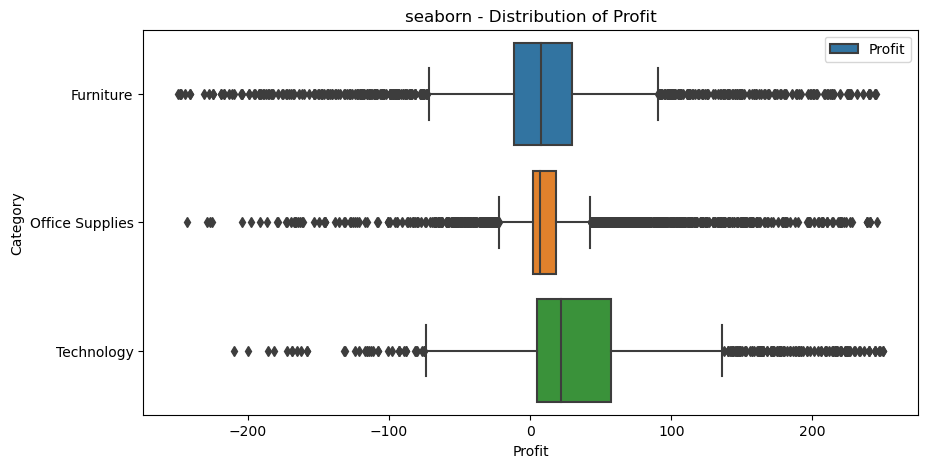

In [13]:
# Graph Size Configuration
plt.figure(figsize=(10,5))    # figsize = (width,height)


# Create histogram using seaborn
sns.boxplot(data = df_clean,
            x = 'Profit',
            y = 'Category')

# Add Title to the graph
plt.title('seaborn - Distribution of Profit')

# Add Legend
plt.legend(['Profit'])

# Save Picture to Computer
plt.savefig('visualisasi_profit.png')

# Showing only the graph
plt.show()

### **pygal**

In [14]:
# pygal visualization
box_plot = pygal.Box(box_mode="tukey", # Mode of box plot, tukey = boxplot whisker is 1.5 * Q1 and 1.5 * Q3
                     explicit_size=True, height=600, width=700  # Changing graph size
                     )


# pygal add title
box_plot.title = 'pygal - Distribution of Profit'
box_plot.x_title = 'Category'
box_plot.y_title = 'Profit'

# pygal add graph
box_plot.add('Furniture', df_clean['Profit'][df['Category'] == 'Furniture'])
box_plot.add('Office Supplies', df_clean['Profit'][df['Category'] == 'Office Supplies'])
box_plot.add('Technology', df_clean['Profit'][df['Category'] == 'Technology'])

# pygal save file
box_plot.render_to_file('Boxplot.svg')

# display graph
display(HTML(base_html.format(rendered_chart=box_plot.render(is_unicode=True))))

While the syntax is more complicated, pygal enables displaying detailed information of the box plot just by hovering the selected data. This will ease you when you want to easily see the detailed Quartile information of the data. Moreover, it provides an interactive graph where you can hide the data by clicking on the legend.

## **2. Bar Chart**
- Bar Chart provides invaluable insight for showing relation between categorical data and numerical data. Bar charts are effective for comparing the values of different categories or groups, as they allow for easy visualization of the relative sizes of the categories.
- In this section, we will display the total of `Sales` per `Sub-category` in both Vertical Bar and Horizontal Bar

### **Seaborn**

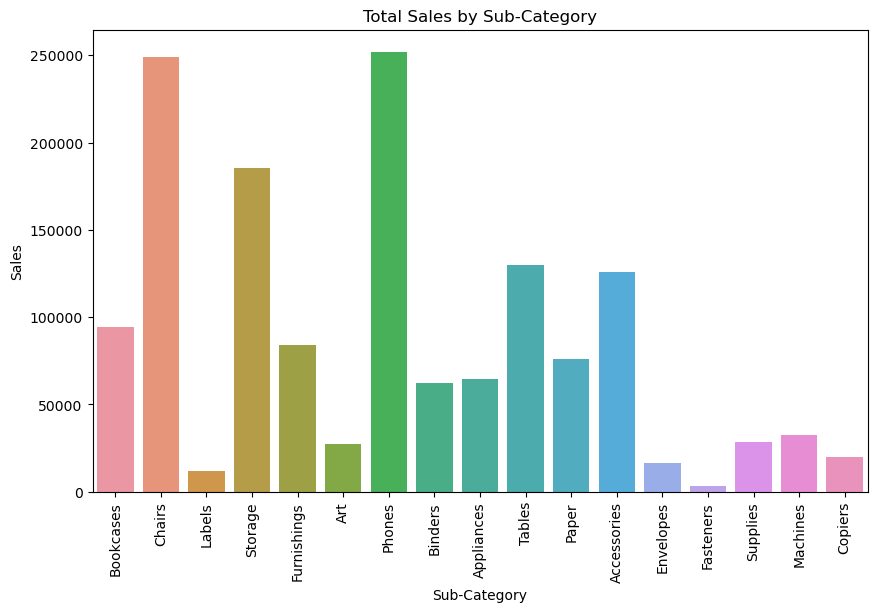

In [15]:
# seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=df_clean,
            x = 'Sub-Category',
            y= 'Sales',
            errorbar=('ci', 0),
            estimator='sum') # by default estimator --> mean
plt.xticks(rotation=90)
plt.title("Total Sales by Sub-Category");

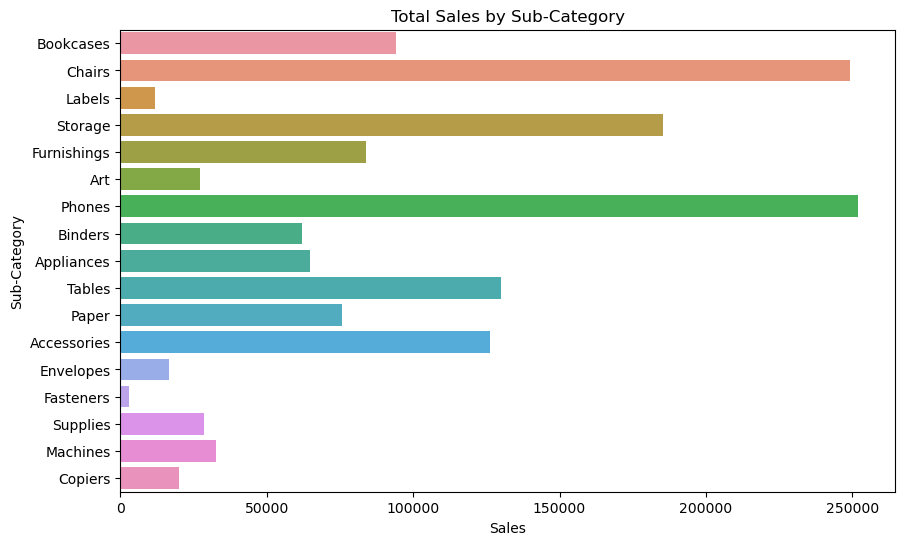

In [16]:
# seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=df_clean,
            x = 'Sales',
            y= 'Sub-Category',
            errorbar=('ci', 0),
            estimator='sum')
plt.title("Total Sales by Sub-Category");

### **pygal**

Before plotting with pygal, we will need to group our data by `Sub-Category` then compute the sum of `Sales` value for each `Sub-Category`.

In [17]:
total_per_sub = df_clean.groupby('Sub-Category')['Sales'].sum()
total_per_sub

Sub-Category
Accessories    126105.3080
Appliances      64796.1710
Art             27110.7520
Binders         62214.5970
Bookcases       94323.1601
Chairs         249193.0420
Copiers         19939.4580
Envelopes       16474.3620
Fasteners        3024.2800
Furnishings     83948.4040
Labels          11699.8320
Machines        32652.3720
Paper           75765.7560
Phones         251972.3460
Storage        185198.7520
Supplies        28559.5840
Tables         130075.3660
Name: Sales, dtype: float64

In [18]:
# pygal

bar = pygal.Bar(explicit_size=True, height=650, width=1200, 
                truncate_label=-1)
bar.title = 'pygal - Total Sales by Sub-Category'

[bar.add(x[0], x[1]) for x in total_per_sub.items()]

bar.value_formatter = lambda x: "%.2f" % x
bar.y_title = 'Total Sales'
bar.x_title = 'Sub-Category'

bar.render_to_file('Barplot.svg')

display(HTML(base_html.format(rendered_chart=bar.render(is_unicode=True))))

To change the graph to Horizontal Bar, you just need to change pygal.Bar to pygal.HorizontalBar

In [19]:
# pygal

bar = pygal.HorizontalBar(explicit_size=True, height=650, width=1200, 
                truncate_label=-1)
bar.title = 'pygal - Total Sales by Sub-Category'

[bar.add(x[0], x[1]) for x in total_per_sub.items()]

bar.value_formatter = lambda x: "%.2f" % x
bar.x_title = 'Total Sales'
bar.y_title = 'Sub-Category'

bar.render_to_file('HBarplot.svg')

display(HTML(base_html.format(rendered_chart=bar.render(is_unicode=True))))

pygal may need more preparation than seaborn in order to plot a graph. But, the result is much cleaner. Coupled with its interactive graphs, pygal may lead to easier insight gathering.

## **3. Line Chart**
- Provides a graph using time-series data that can easily show a trend of data within a set range of date. Each data point represents a specific value, and the lines between them visualize the progression of those values over a continuous interval.

### **Seaborn**

Before plotting the graph, we will create new columns for the line chart

In [20]:
df_clean['Order Month'] = df_clean['Order Date'].apply(lambda x: str(x)[0:7])

# Change Order Month format to datetime
df_clean['Order Month'] = pd.to_datetime(df_clean['Order Month'])
df_clean.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,2018-11-01
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,2018-11-01
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2018-06-01
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,2017-10-01
5,6,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,2016-06-01


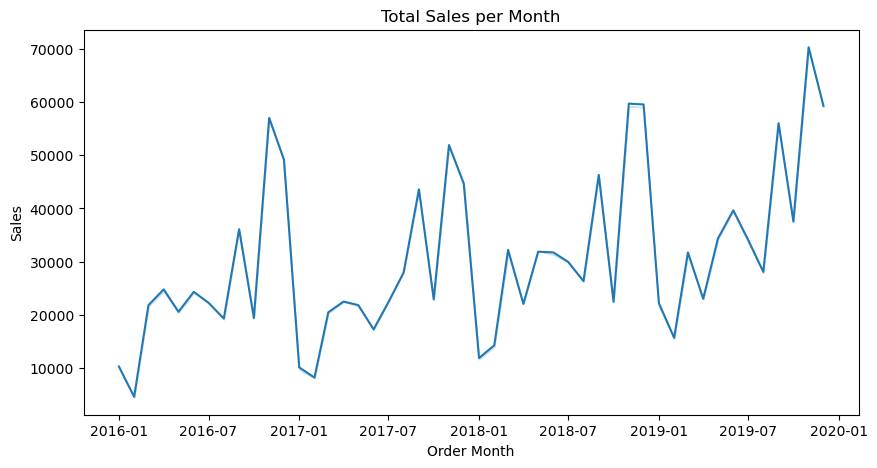

In [21]:
plt.figure(figsize=(10,5))
plt.title('Total Sales per Month')
sns.lineplot(data = df_clean,
             x = 'Order Month',
             y = 'Sales',
             errorbar=('ci', 0),  # removing confidence interval
             estimator=np.sum) # estimator by default : mean

plt.show()

### **pygal**

Before plotting the graph, we need to prepare the data first.

In [22]:
total_by_month = df_clean.groupby('Order Month')['Sales'].sum()
total_by_month

Order Month
2016-01-01    10224.8850
2016-02-01     4519.8920
2016-03-01    21774.8590
2016-04-01    24761.1730
2016-05-01    20534.0050
2016-06-01    24294.0976
2016-07-01    22213.3190
2016-08-01    19270.5525
2016-09-01    36087.2198
2016-10-01    19368.5970
2016-11-01    57062.7047
2016-12-01    49225.9675
2017-01-01    10063.1860
2017-02-01     8140.6110
2017-03-01    20433.7920
2017-04-01    22455.1805
2017-05-01    21790.5825
2017-06-01    17216.9150
2017-07-01    22333.8930
2017-08-01    27928.5042
2017-09-01    43617.4260
2017-10-01    22883.8240
2017-11-01    51942.2025
2017-12-01    44678.5012
2018-01-01    11814.3610
2018-02-01    14228.8650
2018-03-01    32210.2190
2018-04-01    22021.5690
2018-05-01    31851.6120
2018-06-01    31716.1740
2018-07-01    29920.4980
2018-08-01    26319.2258
2018-09-01    46322.0813
2018-10-01    22417.5690
2018-11-01    59751.4838
2018-12-01    59599.7240
2019-01-01    22179.7920
2019-02-01    15636.8774
2019-03-01    31719.2088
2019-04-01   

In [23]:
from datetime import date
label = [date(2016, x, 1) for x in range(1,13)]
label.extend([date(2017, x, 1) for x in range(1,13)])
label.extend([date(2018, x, 1) for x in range(1,13)])
label.extend([date(2019, x, 1) for x in range(1,13)])

In [24]:
value = zip(label, total_by_month)
total_sales = list(value)
total_sales

[(datetime.date(2016, 1, 1), 10224.885),
 (datetime.date(2016, 2, 1), 4519.892),
 (datetime.date(2016, 3, 1), 21774.859),
 (datetime.date(2016, 4, 1), 24761.173),
 (datetime.date(2016, 5, 1), 20534.005),
 (datetime.date(2016, 6, 1), 24294.0976),
 (datetime.date(2016, 7, 1), 22213.319),
 (datetime.date(2016, 8, 1), 19270.5525),
 (datetime.date(2016, 9, 1), 36087.2198),
 (datetime.date(2016, 10, 1), 19368.597),
 (datetime.date(2016, 11, 1), 57062.7047),
 (datetime.date(2016, 12, 1), 49225.9675),
 (datetime.date(2017, 1, 1), 10063.186),
 (datetime.date(2017, 2, 1), 8140.611),
 (datetime.date(2017, 3, 1), 20433.792),
 (datetime.date(2017, 4, 1), 22455.180500000002),
 (datetime.date(2017, 5, 1), 21790.5825),
 (datetime.date(2017, 6, 1), 17216.915),
 (datetime.date(2017, 7, 1), 22333.893),
 (datetime.date(2017, 8, 1), 27928.5042),
 (datetime.date(2017, 9, 1), 43617.426),
 (datetime.date(2017, 10, 1), 22883.824),
 (datetime.date(2017, 11, 1), 51942.2025),
 (datetime.date(2017, 12, 1), 44678.5

In [25]:
# pygal

line = pygal.DateLine(explicit_size=True, height=650, width=1200, 
                truncate_label=-1, x_label_rotation=-90)
line.title = 'pygal - Total Sales per Month'
line.x_labels = label
line.add('Sales', total_sales)

line.value_formatter = lambda x: "%.2f" % x

line.x_title = 'Month'
line.y_title = 'Total Sales'

line.render_to_file('Linechart.svg')

display(HTML(base_html.format(rendered_chart=line.render(is_unicode=True))))

pygal takes more preparation than seaborn to plot a time-series line chart. But, pygal shows tooltip for both time-series and it's value upon hover to ease exploring the data.

## **4. Scatterplot**

### **Seaborn**

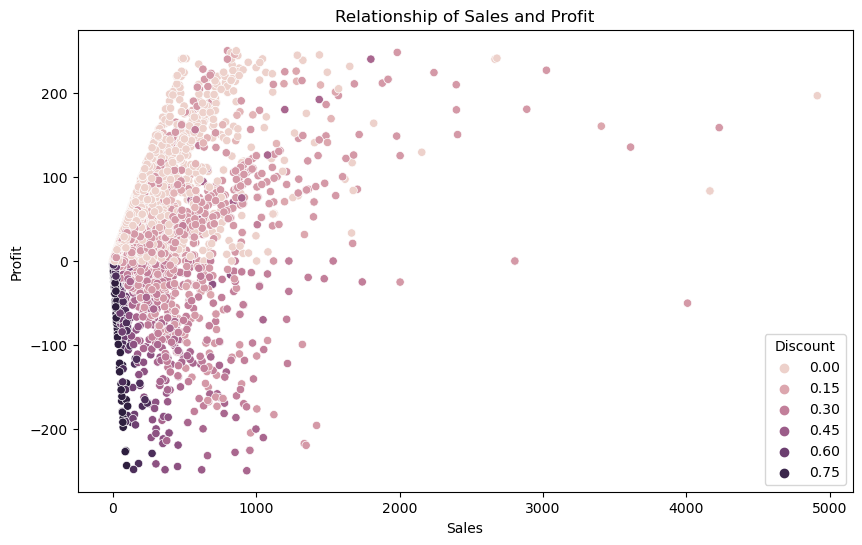

In [26]:
# seaborn
plt.figure(figsize= (10,6))
plt.title('Relationship of Sales and Profit')
sns.scatterplot(data=df_clean,x='Sales',y='Profit',hue='Discount')

plt.show()

### **pygal**

In [27]:
# Zip the sales and profit data grouped by the discount amount
dis0 = zip(df_clean[df_clean['Discount'] == 0]['Sales'],df_clean[df_clean['Discount'] == 0]['Profit'])
dis15 = zip(df_clean[df_clean['Discount'].between(0.1,0.15)]['Sales'],df_clean[df_clean['Discount'].between(0.1,0.15)]['Profit'])
dis30 = zip(df_clean[df_clean['Discount'].between(0.16,0.30)]['Sales'],df_clean[df_clean['Discount'].between(0.16,0.30)]['Profit'])
dis45 = zip(df_clean[df_clean['Discount'].between(0.31,0.45)]['Sales'],df_clean[df_clean['Discount'].between(0.31,0.45)]['Profit'])
dis60 = zip(df_clean[df_clean['Discount'].between(0.46,0.60)]['Sales'],df_clean[df_clean['Discount'].between(0.46,0.60)]['Profit'])
dis75 = zip(df_clean[df_clean['Discount'] > 0.60]['Sales'],df_clean[df_clean['Discount'] > 0.60]['Profit'])

In [28]:
dis0 = list(dis0)
dis15 = list(dis15)
dis30 = list(dis30)
dis45 = list(dis45)
dis60 = list(dis60)
dis75 = list(dis75)

In [29]:
scatter = pygal.XY(stroke=False)
scatter.title = 'Relationship of Sales and Profit'

scatter.add('Discount 0', dis0)
scatter.add('Discount 15', dis15)
scatter.add('Discount 30', dis30)
scatter.add('Discount 45', dis45)
scatter.add('Discount 60', dis60)
scatter.add('Discount 75', dis75)

scatter.x_title = 'Sales'
scatter.y_title = 'Profit'

scatter.render_to_file('Scatter.svg')

display(HTML(base_html.format(rendered_chart=scatter.render(is_unicode=True))))

The interactive feature of pygal which lets you to hide certain series within the graph serve it's value better on scatterplot, which ables you to focus on one data series at a time.

## **5. Treemap**
- Treemap is a graph that displays data as a set of nested rectangles, where each rectangle represents a specific category or subgroup to let you explore deeper within one category. Every rectangle contains a value that corresponds to its size. For this dataset, we will use treemap to show total sales per city grouped by its region.

### **pygal**

In [30]:
# Group and zip total sales per region data, then convert to dictionary
sales_by_region = df_clean.sort_values(by=['Sales'],ascending=False).groupby(['Region'], axis=0).apply(lambda x : [{"value" : v, "label" : l } for v, l in zip(x['Sales'], x['City'])])
sales_by_region.to_dict()

{'Central': [{'value': 4164.049999999999, 'label': 'Springfield'},
  {'value': 2678.94, 'label': 'Noblesville'},
  {'value': 1979.928, 'label': 'Chicago'},
  {'value': 1740.0599999999997, 'label': 'San Antonio'},
  {'value': 1718.4, 'label': 'Fort Worth'},
  {'value': 1652.94, 'label': 'Detroit'},
  {'value': 1554.9360000000001, 'label': 'Houston'},
  {'value': 1439.968, 'label': 'Rockford'},
  {'value': 1415.76, 'label': 'Houston'},
  {'value': 1399.9440000000002, 'label': 'Carrollton'},
  {'value': 1362.8999999999999, 'label': 'Chicago'},
  {'value': 1297.3680000000002, 'label': 'Chicago'},
  {'value': 1287.45, 'label': 'Norman'},
  {'value': 1227.9984, 'label': 'Houston'},
  {'value': 1218.7349999999997, 'label': 'Arlington'},
  {'value': 1212.9599999999998, 'label': 'Huntsville'},
  {'value': 1184.72, 'label': 'Des Moines'},
  {'value': 1117.92, 'label': 'Oklahoma City'},
  {'value': 1106.9099999999999, 'label': 'Detroit'},
  {'value': 1099.96, 'label': 'Dallas'},
  {'value': 1097.

In [31]:
# Append sales_by_region dictionary into new dictionary to combine same city value
region_dict = {}
for key in sales_by_region.keys():
   v = []
   l = []
   region = []
   for item in sales_by_region[key]:
       if item['label'] not in l:
           l.append(item['label'])
           v.append(item['value'])
       else:
           i = l.index(item['label'])
           v[i] += item['value']

   for l,v in zip(l, v):
       region.append({'value':v, 'label':l})
   region_dict[key] = region

# Change to series for input to treemap
tree_series = pd.Series(region_dict)

In [32]:
# pygal treemap

treemap = pygal.Treemap()
treemap.title = 'Sales by Region per City'

[treemap.add(x[0], x[1]) for x in tree_series.items()]

treemap.render_to_file('Treemap.svg')

display(HTML(base_html.format(rendered_chart=treemap.render(is_unicode=True))))

Treemap graph is only available on pygal but not on seaborn or matplotlib. While the data preparation is a little complicated, the resulting graph gives a valuable insight regarding the distribution of sales in each city that has been grouped by its region. We can easily see that the highest sales comes from Los Angeles in the West region followed by New York City in the East region.

## **Conclusion**

While both seaborn and pygal offers easy to code visualization in Python, there are still some difference in each library with their own advantages and disadvantages.

1. Boxplot
    - Seaborn offers easy to code visualization and gives a simple graph that shows the position of quartile with it's outlier.
    - Pygal offers highly customable boxplot with differing whisker according to the type chosen. The interactive graph gives more information about the graph quartile information without needing to calculate it separately.

2. Bar Chart
    - Seaborn Bar Chart is easy to plot and works seamlessly with standard data manipulation library, numpy and pandas.
    - In order to plot Pygal Bar Chart, Dataframe needs to be processed first. But, the resulting graph is much more clearer. It's interactive design makes it easier to find insight from the graph.

3. Line Chart
    - Seaborn Line Chart can be plotted as long as we have time-series column using dataframe data.
    - Pygal Line Chart cannot be plotted immediately using dataframe. There is a need to process the data first, formatting the label to time-series, before finally can be plotted.

4. Scatter Plot
    - Seaborn scatter plot can be plotted directly without processing the dataframe which makes it simple and easy to use
    - For Pygal, dataframe needs to be converted to zip and unpacks before plotting it to the graph. The resulting graph using Pygal is much more easier to read because clustering data can be hidden to make it focus only on specific category.

5. Treemap
    - Treemap is one of uncommon chart that can be plotted using Pygal. This type of chart gives an insight about a sub-category of a much bigger data, giving it a deeper analysis.

Pygal offers numerous with wide range of customization option in order to tailor the appearance and behaviour of the charts to suit a specific needs. While this notebook only offers a small number of chart, the rest of the chart that is not explored and its customization can be found in [pygal Documentation](https://www.pygal.org/en/stable/documentation/index.html). Remember to practice in order to create easy to understand vizzes. Happy Coding! 